# 課程目標:
    了解Keras 內建dataset 如何使用
    

# 範例重點

   使用CIFAR10 練習如何分類, 架構網路層
    
   如何對數據及進行查詢

# 導入必要的程式庫

In [1]:
import numpy as np
from keras.datasets import cifar10 # 小圖像分類
# 數據集50,000張32x32彩色訓練圖像，標註超過10個類別，10,000張測試圖像 

np.random.seed(10)

# 資料準備

In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

170500096/170498071 [==============================] - 32s 0us/step


In [3]:
print('train:', len(x_img_train))
print('test :', len(x_img_test))

train: 50000
test : 10000


In [4]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [6]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [7]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [8]:
#針對物件圖像數據集的類別編列成字典

label_dict = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer",
              5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

In [29]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images, labels, prediction,
                                  idx, num = 10):
    fig = plt.gcf() # Get the current figure, if no current figure exists, a new one is create using figure().
    fig.set_size_inches(12, 14) # Set the figure size in inches.
    if num > 25: 
        num = 25 
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap = 'binary')
                
        title = str(i) + '.' + label_dict[labels[i][0]] # 取出數字
        if len(prediction) > 0:
            title += '=>' + label_dict[prediction[i]]
            
        ax.set_title(title,fontsize = 10) 
        ax.set_xticks([])
        ax.set_yticks([])        
        idx += 1 # next image
    plt.show()

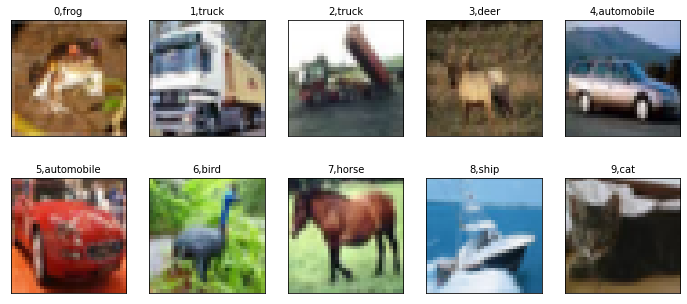

In [30]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train, y_label_train, [], 0)

In [12]:
print('x_img_test:', x_img_test.shape)
print('y_label_test :', y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# 影像正規化

In [13]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [14]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [15]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

# 轉換label 為OneHot Encoding

In [16]:
y_label_train.shape

(50000, 1)

In [17]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [19]:
y_label_train_OneHot.shape

(50000, 10)

In [20]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)